In [35]:
## this program is written in Google colab With GPU support

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## this code is for detecting the google GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:

## this csv upload is only for the google colab
## in local env we just upload with pd.read_csv()
#from google.colab import files
#uploaded = files.upload()

In [0]:
data = pd.read_csv('diabetis_data_edited.csv')

In [38]:
data.head()

,pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,insulin,Body_mass,pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
## now we need to normalize the data 

## but what is normalizing why we need

# Data normalization means transforming all variables in the data to a specific range. 

#why?especially in ANN?

#In ANN and other data mining approaches we need to normalize the inputs, otherwise the network will be ill-conditioned. In essence,
#normalization is done to have the same range of values for each of the inputs to the ANN model. This can guarantee stable convergence 
#of weight and biases.

## if all the data has inside a specfic range and convert into a normal distribution 
## ml algo especially ANN can lead to the convergence 
## otherwise huge numerical value of any  feature will have a bad impact in prediction




In [39]:
## first take the column we need and split the target calue
data.columns

Index(['pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'insulin', 'Body_mass', 'pedigree', 'Age',
       'Class'],
      dtype='object')

In [0]:
X=data[['pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'insulin', 'Body_mass', 'pedigree']]

In [0]:
Y=data[['Class']]

In [0]:
## normalize 
## this called a mx min normalization

#(x-xmin)/(xmax-xmin)
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [0]:
X_norm = normalize(X)

In [44]:
X_norm.head()

,pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,insulin,Body_mass,pedigree
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638


In [0]:
## setting numerical colum
## making placeholder like numerical and catagorical explicitely
## alada alada feature column
prag = tf.feature_column.numeric_column('pregnant')
g_con = tf.feature_column.numeric_column('glucose_concentration')
bp = tf.feature_column.numeric_column('blood_pressure')
st = tf.feature_column.numeric_column('skin_fold_thickness')
insulin = tf.feature_column.numeric_column('insulin')
b_mass = tf.feature_column.numeric_column('Body_mass')
ped = tf.feature_column.numeric_column('pedigree')
#age = tf.feature_column.numeric_column('age')


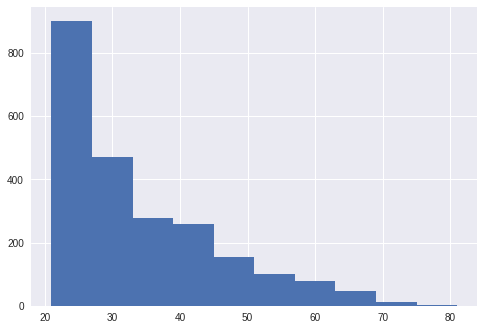

In [46]:
data['Age'].hist()   ## for no reason at all
## create a list of all the feature
## in the regression program we have only one feature ehich is linspace value
feat_col = [prag,g_con,bp,st,insulin,b_mass,ped] #3 feature column er list

In [0]:
from sklearn.model_selection import train_test_split

In [48]:
X_norm.head()

,pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,insulin,Body_mass,pedigree
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638


In [49]:
Y.head()

,Class
0,1
1,0
2,1
3,0
4,1


In [0]:
x_train,x_test,y_train,y_test=train_test_split(X_norm,Y,test_size=.3)

In [0]:
## jei jei feature er list ase star value diye ekta input function create kora
## je je feature column list e ase sei feature er training data diye input_func create kore
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=8,shuffle=True)

In [56]:
model=tf.estimator.LinearClassifier(feature_columns=feat_col)## n_class mane result 2 dhoroner

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsqzc45sq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc741f9e9e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [57]:
model.train(input_fn=input_func,steps=100)

INFO:tensorflow:Calling model_fn.


TypeError: ignored